The TROPOMI instrument (TROPOspheric Monitoring Instrument is a state-of-the-art satellite instrument designed to monitor the Earth's atmosphere), part of the Sentinel-5 Precursor mission, gathers vital data for evaluating air quality. This multispectral sensor captures the reflectance of wavelengths critical in determining the atmospheric levels of ozone, methane, formaldehyde, aerosol, carbon monoxide, nitrogen oxide, and sulphur dioxide. Additionally, it helps in assessing cloud properties.

In [3]:
#Import Nessecary Data

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
import seaborn as sns
import statsmodels.tsa.holtwinters
from scipy.optimize import minimize
from colorama import Fore, Back, Style

import folium
import geopandas as gpd

from sklearn.model_selection import GroupKFold, LeaveOneGroupOut
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.decomposition import TruncatedSVD, NMF

np.set_printoptions(linewidth=95, edgeitems=5)

### Reading the data

In [5]:
train = pd.read_csv(r'C:\Users\SameerAhamed\Documents\GitHub\MACHINE-LEARNING-DSCI6601-PROJECT\dataset\CO2 Emmisions in Rawanda\train.csv',
                    index_col='ID_LAT_LON_YEAR_WEEK')
test = pd.read_csv(r'C:\Users\SameerAhamed\Documents\GitHub\MACHINE-LEARNING-DSCI6601-PROJECT\dataset\CO2 Emmisions in Rawanda\test.csv',
                   index_col='ID_LAT_LON_YEAR_WEEK')
train

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_-3.299_30.301_2021_48,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
ID_-3.299_30.301_2021_49,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
ID_-3.299_30.301_2021_50,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205


i made ID_LATITUDE_LONGITUDE_YEAR_WEEK columns as index as they are unique.

In [6]:
for index, column in enumerate(train.columns):
    print(f"{index:2}: {column}")

 0: latitude
 1: longitude
 2: year
 3: week_no
 4: SulphurDioxide_SO2_column_number_density
 5: SulphurDioxide_SO2_column_number_density_amf
 6: SulphurDioxide_SO2_slant_column_number_density
 7: SulphurDioxide_cloud_fraction
 8: SulphurDioxide_sensor_azimuth_angle
 9: SulphurDioxide_sensor_zenith_angle
10: SulphurDioxide_solar_azimuth_angle
11: SulphurDioxide_solar_zenith_angle
12: SulphurDioxide_SO2_column_number_density_15km
13: CarbonMonoxide_CO_column_number_density
14: CarbonMonoxide_H2O_column_number_density
15: CarbonMonoxide_cloud_height
16: CarbonMonoxide_sensor_altitude
17: CarbonMonoxide_sensor_azimuth_angle
18: CarbonMonoxide_sensor_zenith_angle
19: CarbonMonoxide_solar_azimuth_angle
20: CarbonMonoxide_solar_zenith_angle
21: NitrogenDioxide_NO2_column_number_density
22: NitrogenDioxide_tropospheric_NO2_column_number_density
23: NitrogenDioxide_stratospheric_NO2_column_number_density
24: NitrogenDioxide_NO2_slant_column_number_density
25: NitrogenDioxide_tropopause_pressur

I'm working with a satellite that tracks various atmospheric gases, though it doesn't track CO2. My job is to estimate CO2 emissions across different locations and times, using data on other gas concentrations. The method of measuring CO2 emissions is unclear to me. Unlike the other gases, CO2 isn't measured by the Sentinel-5P satellite. It's possible that ground stations or another satellite might be tracking these emissions.

In [9]:
import pandas as pd

# Example DataFrame
data = {
    'column1': [1, 2, 3, 4, 5],
    'column2': ['a', 'b', 'c', 'd', 'e'],
    'other_column': [10, 20, 30, 40, 50]
}
old_df = pd.DataFrame(data)

# Selecting the columns to merge into a new DataFrame
new_df = old_df[['column1', 'column2']].copy()

# Convert columns to string and merge them
new_df['merged_column'] = new_df['column1'].astype(str) + new_df['column2'].astype(str)

# Now, new_df contains only 'column1' and 'column2' from old_df
print(new_df)

unique_values = new_df['merged_column'].unique()

print(len(unique_values))

   column1 column2 merged_column
0        1       a            1a
1        2       b            2b
2        3       c            3c
3        4       d            4d
4        5       e            5e
5


In [15]:
# df_v1 contains the Latitude and Longitude columns for EDA

# Selecting the columns to merge into a new DataFrame
df_v1 = train[['latitude', 'longitude']].copy()

# Convert columns to string and merge them
df_v1['LAT_LON'] = df_v1['latitude'].astype(str) + df_v1['longitude'].astype(str)

# Find Unique Values
unique_values = df_v1['LAT_LON'].unique()

# Print Length of the unique values
print(f' There are {len(unique_values)} unique coordinates from where we took the observation')

 There are 497 unique coordinates from where we took the observation


In [17]:
print(train.groupby(['latitude', 'longitude']).size().sort_values())
print('---------------------------')
print(test.groupby(['latitude', 'longitude']).size().sort_values())
print('---------------------------')
print(pd.concat([train, test], axis=0).groupby(['latitude', 'longitude']).size().sort_values())

latitude  longitude
-3.299    30.301       159
-1.444    30.856       159
-1.450    29.350       159
-1.482    30.618       159
-1.486    29.614       159
                      ... 
-2.293    29.507       159
-2.300    29.200       159
-2.301    29.899       159
-2.257    30.243       159
-0.510    29.290       159
Length: 497, dtype: int64
---------------------------
latitude  longitude
-3.299    30.301       49
-1.444    30.856       49
-1.450    29.350       49
-1.482    30.618       49
-1.486    29.614       49
                       ..
-2.293    29.507       49
-2.300    29.200       49
-2.301    29.899       49
-2.257    30.243       49
-0.510    29.290       49
Length: 497, dtype: int64
---------------------------
latitude  longitude
-3.299    30.301       208
-1.444    30.856       208
-1.450    29.350       208
-1.482    30.618       208
-1.486    29.614       208
                      ... 
-2.293    29.507       208
-2.300    29.200       208
-2.301    29.899       208
-2.257

For every geographical point, there are 159 rows with observations in train and 49 rows in test.
The 159 training rows correspond to three years (2019, 2020, 2021) with 53 weeks each (numbered from 0 to 52).
The 49 test rows correspond to weeks 0 to 48 of 2022.
497 * 3 * 53 = 79023, the size of the training dataset.
497 * 49 = 24353, the size of the test set.

In [18]:
# Taken from https://www.kaggle.com/code/inversion/getting-started-eda

train_coords = train.drop_duplicates(subset = ['latitude', 'longitude'])
geometry = gpd.points_from_xy(train_coords.longitude, train_coords.latitude)
geo_df = gpd.GeoDataFrame(
    train_coords[["latitude", "longitude"]], geometry=geometry
)

# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Iterate through list and add a marker for each location
for coordinates in geo_df_list:

    # Place the markers 
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            color =  "red"),
        )
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

Since our project involves geospatial data, leveraging the measurements from surrounding areas could enhance our ability to forecast the desired outcome. An effective machine learning model should go beyond utilizing the 74 attributes of each individual row for prediction, and should incorporate data from adjacent locations for more accurate results. Additionally, the dataset is structured as a time series, suggesting that historical data points might be useful in predicting present values.

In [19]:
# Sorting the Missingness in 
with pd.option_context("display.min_rows", 14):
    display(train.isna().sum().sort_values())

latitude                                          0
week_no                                           0
emission                                          0
longitude                                         0
year                                              0
Cloud_solar_zenith_angle                        484
Cloud_cloud_top_pressure                        484
                                              ...  
UvAerosolLayerHeight_sensor_zenith_angle      78584
UvAerosolLayerHeight_solar_azimuth_angle      78584
UvAerosolLayerHeight_sensor_azimuth_angle     78584
UvAerosolLayerHeight_aerosol_optical_depth    78584
UvAerosolLayerHeight_aerosol_height           78584
UvAerosolLayerHeight_solar_zenith_angle       78584
UvAerosolLayerHeight_aerosol_pressure         78584
Length: 75, dtype: int64

We need a way to handle missing data. As data is missing in train and test, we cannot simply drop rows with missing data, but need to impute the missing values.
As we are working with geographical data, measurements of nearby locations can be used for imputing missing values.
As the data is a time series, measurements of nearby points in time can be used for imputing missing values.

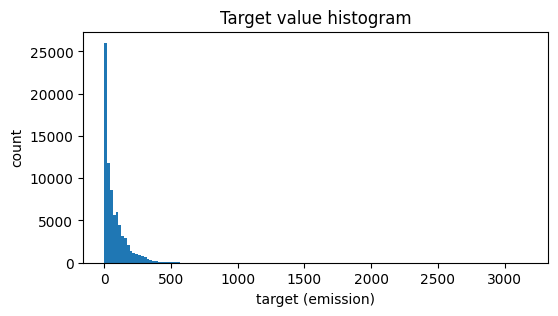

In [21]:
# Distribution of the Target Value

plt.figure(figsize=(6, 3))
plt.hist(train.emission, bins=150)
plt.title('Target value histogram')
plt.xlabel('target (emission)')
plt.ylabel('count')
plt.show()

In [22]:
def rgba_to_hex(color):
    """Return color as #rrggbb for the given color values."""
    red, green, blue, alpha = color
    return f"#{int(red*255):02x}{int(green*255):02x}{int(blue*255):02x}"

temp = train.groupby(['latitude', 'longitude']).emission.mean().reset_index()
geometry = gpd.points_from_xy(temp.longitude, temp.latitude)

cmap = matplotlib.colormaps['coolwarm']
normalizer = matplotlib.colors.Normalize(vmin=np.log1p(temp.emission.min()), vmax=np.log1p(temp.emission.max()))

# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geometry]

# Iterate through list and add a marker for each location
for coordinates, emission in zip(geo_df_list, temp.emission):
#     print(emission, normalizer(emission), rgba_to_hex(cmap(normalizer(emission))))
    # Place the markers 
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            color = rgba_to_hex(cmap(normalizer(np.log1p(emission))))),
        )
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

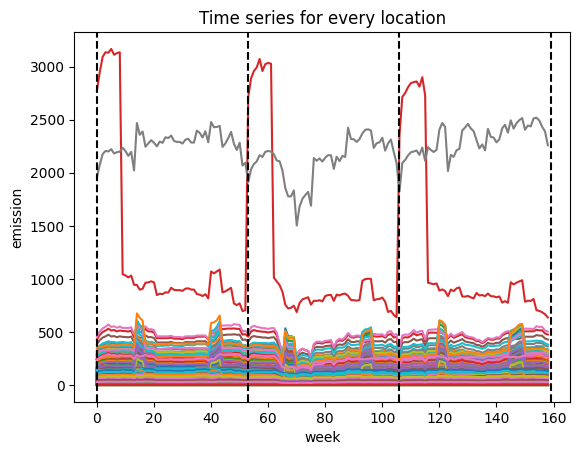

In [23]:
for ll in train[['latitude', 'longitude']].drop_duplicates().iterrows():
    time_series = train[(train.latitude == ll[1].latitude) & (train.longitude == ll[1].longitude)].emission
    plt.plot(range(len(time_series)), time_series)
plt.title('Time series for every location')
for week in [0, 53, 106, 159]:
    plt.axvline(week, color='k', linestyle='--')
plt.xlabel('week')
plt.ylabel('emission')
plt.show()

In [24]:
score_list = []
kf = LeaveOneGroupOut()
for fold, (idx_tr, idx_va) in enumerate(kf.split(train, groups=train.year)):
    X_tr = train.iloc[idx_tr][['longitude', 'latitude', 'week_no']]
    y_tr = train.iloc[idx_tr]['emission']
    X_va = train.iloc[idx_va][['longitude', 'latitude', 'week_no']]
    y_va = train.iloc[idx_va]['emission']

    model = RadiusNeighborsRegressor(radius=0)
    model.fit(X_tr, y_tr)
    y_va_pred = model.predict(X_va)
    rmse = mean_squared_error(y_va, y_va_pred, squared=False)
    print(f"Fold {fold} year {train.iloc[idx_va].year.iloc[0]}: rmse = {rmse:.2f}")
    score_list.append(rmse)

rmse = sum(score_list) / len(score_list)
print(f"Overall RMSE: {rmse:.2f}")

Fold 0 year 2019: rmse = 20.29
Fold 1 year 2020: rmse = 27.14
Fold 2 year 2021: rmse = 19.77
Overall RMSE: 22.40


In [25]:
model = RadiusNeighborsRegressor(radius=0)
model.fit(train[['longitude', 'latitude', 'week_no']], train.emission)
y_pred = model.predict(test[['longitude', 'latitude', 'week_no']])
submission_standard = pd.Series(y_pred, name='emission', index=test.index)
submission_standard.to_csv('submission_standard.csv')
submission_standard

ID_LAT_LON_YEAR_WEEK
ID_-0.510_29.290_2022_00     3.608051
ID_-0.510_29.290_2022_01     4.016319
ID_-0.510_29.290_2022_02     4.138755
ID_-0.510_29.290_2022_03     4.184737
ID_-0.510_29.290_2022_04     4.247569
                              ...    
ID_-3.299_30.301_2022_44    28.725407
ID_-3.299_30.301_2022_45    29.048892
ID_-3.299_30.301_2022_46    29.252211
ID_-3.299_30.301_2022_47    29.794027
ID_-3.299_30.301_2022_48    28.759248
Name: emission, Length: 24353, dtype: float64